# Revisão dos currículos.

## Changelog

versionadded
: 24.07

    - first version revision (20)


versionchanged
: 24.07

    - pie chart for majojority areas (20)

>   **Open Source Notification:** This file is part of open source program **INEP**
>   > **Copyright © 2023  Carlo Oliveira** [carlo @ nce](mailto:carlo@nce.ufrj.br),
> 
>   **SPDX-License-Identifier:** [GNU General Public License v3.0 or later] (https://is.gd/3Udt).
>   > Labase (http://labase.selfip.org/) - NCE (https://portal.nce.ufrj.br) - UFRJ (https://ufrj.br/).

> codeauthor:: [Carlo Oliveira](mailto:carlo@nce.ufrj.br)

## Carrega do arquivo editado CSV

In [88]:
from ipnb.util import vetorize, tokenize_into_words, euclid
import os
from pathlib import Path
import pandas as pd
here = os.path.abspath('')
dados = Path(here).parent.parent / "src" / "data" / 'relatorio0.csv'
df = pd.read_csv(dados, dtype=dict(rotulo=str))
dados = Path(here).parent.parent / "src" / "data" / 'relatorio1.csv'
dt = pd.read_csv(dados, dtype=dict(rotulo=str))
df['tokens'] = df["nome_disciplina"].apply(tokenize_into_words)
df['vector'] = df["tokens"].apply(vetorize)
df['ch'] = dt["ch"]
df['rotulo'] = df["rotulo"].astype(str)
df["chw"] = df.apply(lambda row: row["ch"] * row.dentro, axis=1)
dd = df.groupby(['rotulo'])["chw"].sum().reset_index()
df

/home/carlo/Documentos/dev/spike/src/ipnb/util.py:64: RuntimeWarning: Mean of empty slice.
  return np.array([GLOVER[w] for w in _words]).mean(axis=0)


,curso_id,dentro,nome_disciplina,horas,rotulo,nomeado,tokens,vector,ch,chw
0,1666036,1.0,Projeto Integrador - Elementos e Conceitos de ...,70,0612D01,defesa cibernética,"[projeto, integrador, elementos, conceitos, ci...","[-0.05084260000000003, 0.20778920000000003, 0....",2.138057,2.138057
1,1666036,1.0,Sistemas Computacionais para CiberSegurança,63,0612D01,defesa cibernética,"[sistemas, computacionais, cibersegurança]","[0.098875, 0.17971766666666666, 0.112613666666...",1.924252,1.924252
2,1666036,1.0,Estudo do Espaço Cibernético,63,0612D01,defesa cibernética,"[estudo, espaço, cibernético]","[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.924252
3,1666036,0.0,Lógica Matemática,63,0612D01,defesa cibernética,"[lógica, matemática]","[0.064137, 0.145569, -0.057595499999999994, 0....",1.924252,0.000000
4,1666036,0.0,Teologia e Fenômeno Humano,32,0612D01,defesa cibernética,"[teologia, fenômeno, humano]","[0.10753833333333333, -0.08160933333333333, 0....",0.977398,0.000000
...,...,...,...,...,...,...,...,...,...,...
724,1549921,1.0,Usabilidade e Fatores Humanos em Cibersegurança,80,0615S01,segurança da informação,"[usabilidade, fatores, humanos, cibersegurança]","[0.210529, 0.24265525, -0.049493749999999996, ...",2.020202,2.020202
725,1549921,1.0,Governança de Cibersegurança,80,0615S01,segurança da informação,"[governança, cibersegurança]","[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,2.020202
726,1549921,1.0,Blockchain,80,0615S01,segurança da informação,[blockchain],"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",2.020202,2.020202
727,1549921,0.0,Empreendedorismo e Inovação em TI,40,0615S01,segurança da informação,"[empreendedorismo, inovação, ti]","[0.232263, -0.22350466666666668, -0.0052239999...",1.010101,0.000000


## Calcula os vetores linguísticos dos rótulos 

In [89]:
dv = df.groupby(['rotulo'])["vector"].mean()
dv

rotulo
0612D01    [0.08212626658258101, 0.14919778840945308, 0.0...
0612G01    [0.11604870310734465, 0.09433873644067801, 0.0...
0615S01    [0.08014285920542637, 0.15576943071705426, 0.0...
0615S02    [0.10645183789198606, 0.1499687845818815, 0.05...
0615S03    [0.11720448863826236, 0.09879519181286549, 0.0...
0616I01    [0.15059945432098765, 0.1414789487654321, -0.0...
6130       [0.0712639909733124, 0.05999575782312926, 0.07...
Name: vector, dtype: object

## Dicionário de vetores por sub área

In [95]:
dr =df["curso_id rotulo vector chw".split()].copy()
dr.drop(dr[dr['chw'] < 0.9].index, inplace=True)
sub = dr.groupby(['rotulo'])["vector"].mean().to_dict()
sub = {k.replace("6130", "0613E01"): v for k, v in sub.items()}
list(sub.keys())

['0612D01', '0612G01', '0615S01', '0615S02', '0615S03', '0616I01', '0613E01']

## Calcula as distancias das disciplina para a sub área

In [96]:
for rotulo, vetor in sub.items():
    dr[rotulo] = dr.apply(lambda row: euclid(row.vector, vetor), axis=1)
    
dr.dropna(subset=['vector'], inplace=True)
dr

,curso_id,rotulo,vector,chw,0612D01,0612G01,0615S01,0615S02,0615S03,0616I01,0613E01
0,1666036,0612D01,"[-0.05084260000000003, 0.20778920000000003, 0....",2.138057,0.731249,0.763427,0.757032,0.743088,0.732168,0.847415,0.729281
1,1666036,0612D01,"[0.098875, 0.17971766666666666, 0.112613666666...",1.924252,0.680498,0.731049,0.706695,0.715295,0.722358,0.700725,0.746368
2,1666036,0612D01,"[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.084343,0.983897,1.143709,1.048054,0.988626,1.187863,0.941996
7,1666036,0612D01,"[-0.041893, 0.042076499999999996, -0.129196, 0...",0.977398,1.067151,1.199819,1.101751,1.132251,1.116356,1.113157,1.162390
8,1666036,0612D01,"[0.191217, -0.016402749999999994, 0.0289179999...",2.138057,0.632310,0.659860,0.734507,0.639921,0.642531,0.712971,0.734369
...,...,...,...,...,...,...,...,...,...,...,...
723,1549921,0615S01,"[0.036238375, -0.08854762499999999, 0.12195099...",3.030303,0.688523,0.590987,0.721782,0.682976,0.619130,0.817801,0.542640
724,1549921,0615S01,"[0.210529, 0.24265525, -0.049493749999999996, ...",2.020202,0.794967,0.913621,0.777926,0.911468,0.913009,0.865949,0.995145
725,1549921,0615S01,"[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,0.927376,1.140314,0.964152,1.080154,1.119660,0.982037,1.250610
726,1549921,0615S01,"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",2.020202,0.788815,0.767693,0.833800,0.822052,0.769220,0.918792,0.664386


## Determina a área mais próxima por disciplina

In [97]:
cols = ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']
def rotulo(rotular):
    return cols[rotular.index(min(rotular))]
dr["tag"] = dr.apply(lambda row: rotulo([row.get(c) for c in cols]), axis=1)
dr

cols ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']


,curso_id,rotulo,vector,chw,0612D01,0612G01,0615S01,0615S02,0615S03,0616I01,0613E01,tag
0,1666036,0612D01,"[-0.05084260000000003, 0.20778920000000003, 0....",2.138057,0.731249,0.763427,0.757032,0.743088,0.732168,0.847415,0.729281,0613E01
1,1666036,0612D01,"[0.098875, 0.17971766666666666, 0.112613666666...",1.924252,0.680498,0.731049,0.706695,0.715295,0.722358,0.700725,0.746368,0612D01
2,1666036,0612D01,"[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.084343,0.983897,1.143709,1.048054,0.988626,1.187863,0.941996,0613E01
7,1666036,0612D01,"[-0.041893, 0.042076499999999996, -0.129196, 0...",0.977398,1.067151,1.199819,1.101751,1.132251,1.116356,1.113157,1.162390,0612D01
8,1666036,0612D01,"[0.191217, -0.016402749999999994, 0.0289179999...",2.138057,0.632310,0.659860,0.734507,0.639921,0.642531,0.712971,0.734369,0612D01
...,...,...,...,...,...,...,...,...,...,...,...,...
723,1549921,0615S01,"[0.036238375, -0.08854762499999999, 0.12195099...",3.030303,0.688523,0.590987,0.721782,0.682976,0.619130,0.817801,0.542640,0613E01
724,1549921,0615S01,"[0.210529, 0.24265525, -0.049493749999999996, ...",2.020202,0.794967,0.913621,0.777926,0.911468,0.913009,0.865949,0.995145,0615S01
725,1549921,0615S01,"[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,0.927376,1.140314,0.964152,1.080154,1.119660,0.982037,1.250610,0612D01
726,1549921,0615S01,"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",2.020202,0.788815,0.767693,0.833800,0.822052,0.769220,0.918792,0.664386,0613E01


## Calcula a carga horária proporcional

In [134]:
ds = dr.groupby(['curso_id', 'rotulo', 'tag'])["chw"].sum().reset_index()
ds["rotulo"] = ds["rotulo"].apply(lambda x: x.replace("6130", "0613E01"))
ds

,curso_id,rotulo,tag,chw
0,153693,0612G01,0612D01,6.521739
1,153693,0612G01,0612G01,6.521739
2,153693,0612G01,0613E01,11.956522
3,153693,0612G01,0615S01,16.304348
4,153693,0612G01,0615S02,9.782609
...,...,...,...,...
140,1671887,0612D01,0612G01,15.135135
141,1671887,0612D01,0613E01,3.243243
142,1671887,0612D01,0615S01,19.459459
143,1671887,0612D01,0615S02,4.324324


### Gráficos em pizza dos cálculos das áreas das disciplinas

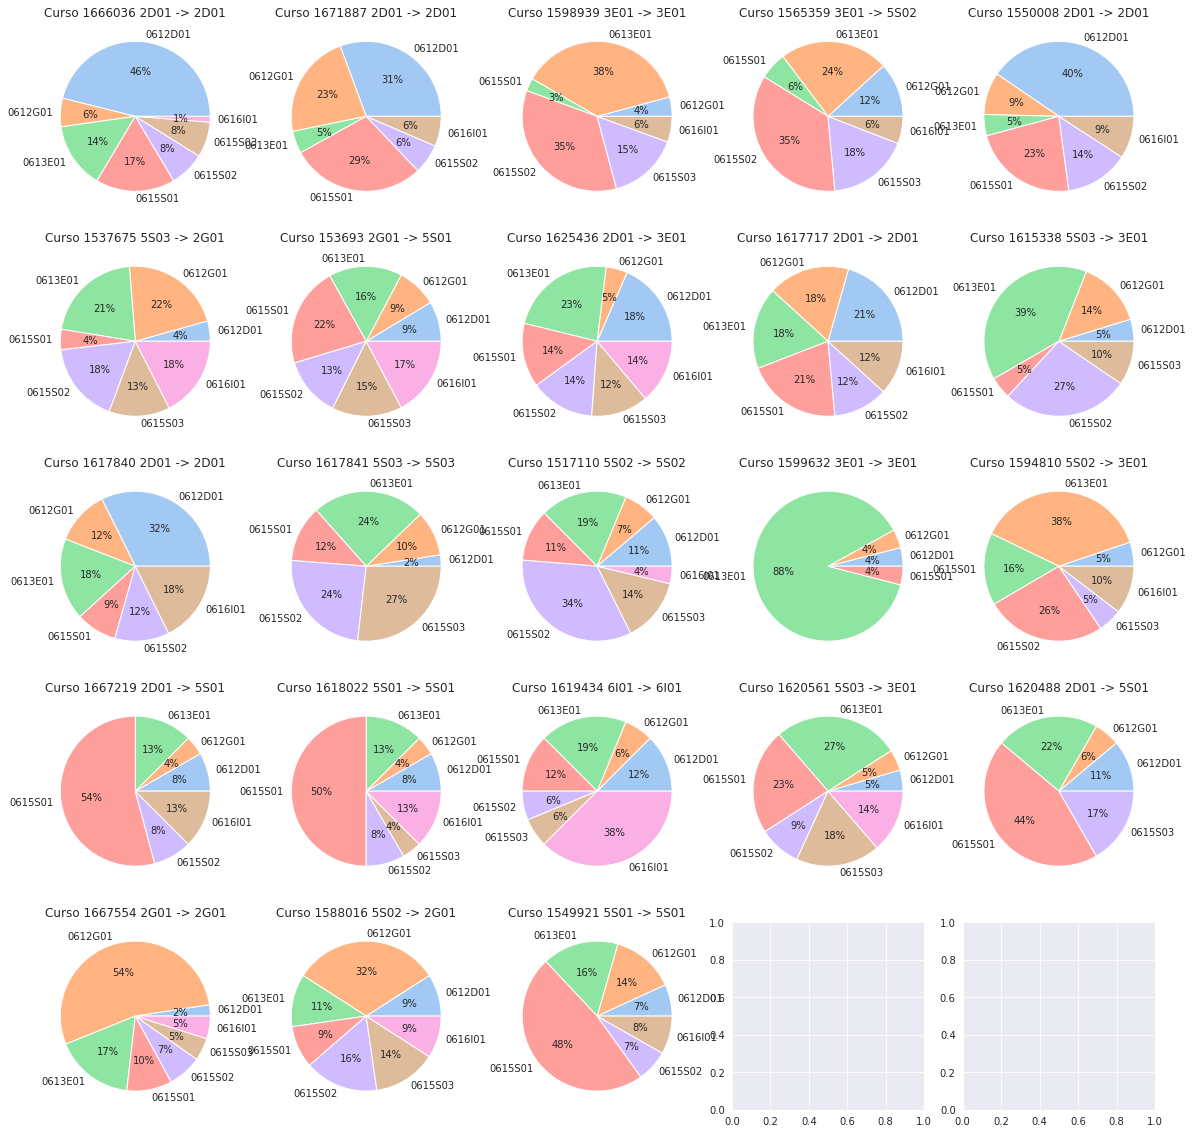

In [135]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 5, figsize=(20,20))
dp = ds[["curso_id", "chw"]].copy()
import seaborn as sns
colors = sns.color_palette('pastel')[0:7]
oid = df['curso_id'].drop_duplicates().to_list()
def plot(data, i):
    chw = ds[ds['curso_id'] == data]["chw"]  # carga horária da disciplina ponderada
    chn = ds[ds['curso_id'] == data]["rotulo"].to_list()[0][-4:]  # rótulo original atribuído
    chl = chw.to_list()  # lista com a carga horária da disciplina ponderada
    chi = chl.index(max(chl))  # índice da nova sub área indicada por ser majoritária
    ch_tag = ds[ds['curso_id'] == data].iloc[chi]["tag"][-4:]  # rótulo da nova sub área indicada por ser majoritária
    axs[i //5, i % 5].pie(chw, labels=ds[ds['curso_id'] == data]["tag"].to_list(), colors = colors, autopct='%.0f%%')
    axs[i //5, i % 5].set_title(f'Curso {data} {chn} -> {ch_tag}')  # título com id do curso, área original e indicada
# create pie chart
[plot(data, i) for i, data in enumerate(oid)]
plt.show()
